# Яременко Вікторія Лабораторна 4

1. Розробити власну архітектуру GAN для датасету fashion mnist  для побудови реалістичного зображення певного типу одягу, наприклад, штанів, футболки, сукні.
Необхідно завантажити датасет, вивести типи одягу, що містить датасет.
Підготувати дані, підібрати кількість шарів, функції активації і тд.
Побудувати графік функції втрат, вивести значення функції втрат. Вивести результат.

Выходные данные были обрезаны до нескольких последних строк (5000).
2/2 [==============================] - 0s 14ms/step
16000 [D loss: 0.007543, acc.: 100.00%] [G loss: 5.163037]
2/2 [==============================] - 0s 15ms/step
17000 [D loss: 0.002306, acc.: 100.00%] [G loss: 4.464862]
2/2 [==============================] - 0s 16ms/step
18000 [D loss: 0.026001, acc.: 99.22%] [G loss: 3.267666]
2/2 [==============================] - 0s 13ms/step
19000 [D loss: 0.002941, acc.: 100.00%] [G loss: 2.816158]
1/1 [==============================] - 0s 218ms/step


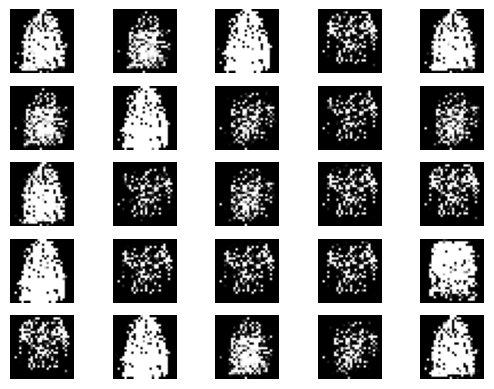

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Завантаження датасету Fashion MNIST
(x_train, _), (_, _) = fashion_mnist.load_data()

# Виведення типів одягу, що містяться в датасеті
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Типи одягу:", class_names)

# Підготовка даних
x_train = x_train.astype('float32') / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))

# Розмір зображень та шуму для генератора
img_shape = (28, 28, 1)
z_dim = 100

# Функція, яка створює генератор
def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(np.prod(img_shape), activation='sigmoid'))
    model.add(Reshape(img_shape))
    return model

# Функція, яка створює дискримінатор
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Збудувати та скомпілювати генератор
generator = build_generator(z_dim)
generator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Збудувати та скомпілювати дискримінатор
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Збудувати та скомпілювати комбіновану модель (генератор + дискримінатор)
z = Input(shape=(z_dim,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam())

# Функція для тренування GAN
def train(epochs, batch_size, sample_interval):
    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        # Sample noise and generate a batch of new images
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        gen_imgs = generator.predict(noise)

        # Label real and generated images
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = combined.train_on_batch(noise, valid)

        # Print the progress
        if epoch % sample_interval == 0:
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

# Навчання GAN
epochs = 20000
batch_size = 64
sample_interval = 1000
train(epochs, batch_size, sample_interval)


# Виведення результату
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, z_dim))
gen_imgs = generator.predict(noise)
gen_imgs = 0.5 * gen_imgs + 0.5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()


2. Намалювати крижинку Коха з можливістю вибору рівня рекурсії.

Введіть рівень рекурсії (наприклад, 3): 3


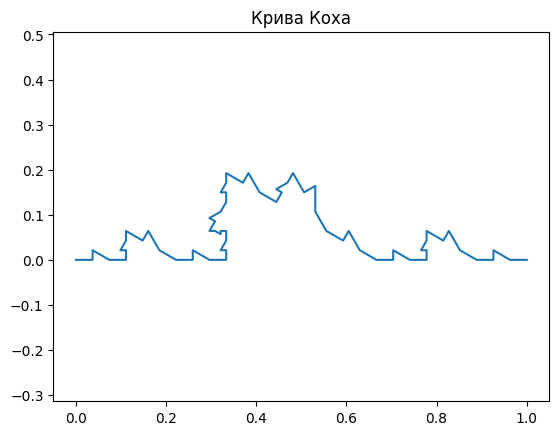

In [9]:

def koch_curve(start, end, order):
    if order == 0:
        return [start, end]
    else:
        # Розрахунок нових точок
        v = end - start
        p1 = start + v / 3
        p3 = start + 2 * v / 3
        p2 = p1 + np.dot(np.array([[0, -1], [1, 0]]), p3 - p1) / np.sqrt(3)

        # Рекурсивне викликання для кожного відрізка
        line1 = koch_curve(start, p1, order - 1)
        line2 = koch_curve(p1, p2, order - 1)
        line3 = koch_curve(p2, p3, order - 1)
        line4 = koch_curve(p3, end, order - 1)

        # З'єднання всіх відрізків
        return np.vstack([line1, line2[1:], line3[1:], line4])

def main():
    # Введення рівня рекурсії
    order = int(input("Введіть рівень рекурсії (наприклад, 3): "))

    # Визначення початкових і кінцевих точок
    start = np.array([0, 0])
    end = np.array([1, 0])

    # Отримання координат кривої Коха
    points = koch_curve(start, end, order)

    # Відображення кривої Коха
    plt.plot(points[:, 0], points[:, 1])
    plt.title('Крива Коха')
    plt.axis('equal')
    plt.show()

if __name__ == "__main__":
    main()


3. Намалювати килим Серпинського.

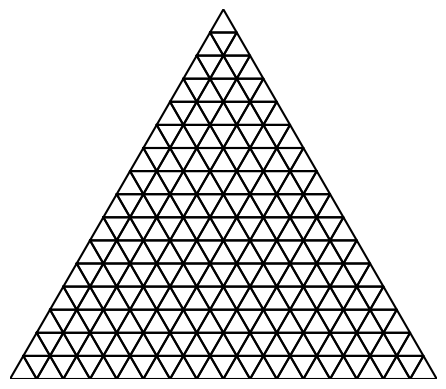

In [1]:

# Функція для малювання одного трикутника
def draw_triangle(ax, p1, p2, p3):
    ax.plot([p1[0], p2[0], p3[0], p1[0]], [p1[1], p2[1], p3[1], p1[1]], 'k')

# Функція для рекурсивного малювання килима Серпінського
def serpinski_carpet(ax, p1, p2, p3, depth):
    if depth == 0:
        draw_triangle(ax, p1, p2, p3)
    else:
        # Знаходимо серединні точки кожного відрізка
        p12 = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
        p23 = ((p2[0] + p3[0]) / 2, (p2[1] + p3[1]) / 2)
        p31 = ((p3[0] + p1[0]) / 2, (p3[1] + p1[1]) / 2)

        # Рекурсивно викликаємо функцію для малювання трикутників
        serpinski_carpet(ax, p1, p12, p31, depth - 1)
        serpinski_carpet(ax, p12, p2, p23, depth - 1)
        serpinski_carpet(ax, p31, p23, p3, depth - 1)
        serpinski_carpet(ax, p12, p23, p31, depth - 1)

# Основна функція для малювання килима Серпінського
def main():
    # Початкові координати трикутника
    p1 = np.array([0, 0])
    p2 = np.array([1, 0])
    p3 = np.array([0.5, np.sqrt(3) / 2])

    # Глибина рекурсії
    depth = 4

    # Створення графіку
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')

    # Виклик рекурсивної функції малювання килима Серпінського
    serpinski_carpet(ax, p1, p2, p3, depth)

    # Встановлення меж та відображення результату
    ax.set_xlim(0, 1)
    ax.set_ylim(0, np.sqrt(3) / 2)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Висновок: під час цієї роботи була успішно розроблена власна архітектура GAN для датасету fashion mnist  для побудови реалістичного зображення певного типу одягу та побудований графік функції втрат. А також намальована крижинка Коха з можливістю вибору рівня рекурсії та килим Серпинського.